In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.task_modeling.simulator.neural_simulator import NeuralDataSimulatorGeneral
# Import pca
import dotenv

dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:

HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

run_tag = "20240503_Fig1_NBFF_NODE"
subfolder = "max_epochs=500 n_samples=1000 latent_size=3 seed=0 learning_rate=0.001"
dataset_path= HOME_DIR + 'content/trained_models/task-trained/' 
pathTT = dataset_path + run_tag + '/'+ subfolder + '/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)

wrapper = an_TT.wrapper
dm = an_TT.datamodule



/home/csverst/Github/CtDBenchmark/


In [8]:

embed_dict = {
    "rect_func": 'exp', # exp, sigmoid, softplus
    "fr_scaling": 1.0,
    
}
noise_dict_under = {
    "obs_noise": "pseudoPoisson",
    "dispersion": 0.01,
}
noise_dict_poisson = {
    "obs_noise": "pseudoPoisson",
    "dispersion": 1.0
}
noise_dict_poisson_true = {
    "obs_noise": "poisson",
}
noise_dict_over = {
    "obs_noise": "pseudoPoisson",
    "dispersion": 5.0
}
sim_under = NeuralDataSimulatorGeneral(embed_dict = embed_dict, noise_dict = noise_dict_under)
sim_poisson = NeuralDataSimulatorGeneral(embed_dict = embed_dict, noise_dict = noise_dict_poisson)
sim_over = NeuralDataSimulatorGeneral(embed_dict = embed_dict, noise_dict = noise_dict_over)

sim_dict_under = sim_under.generate_simulated_data(
    task_trained_model = wrapper, 
    datamodule = dm,
    seed = 0,   
    )

sim_dict_poisson = sim_poisson.generate_simulated_data(
    task_trained_model = wrapper, 
    datamodule = dm, 
    seed = 0,   
    )

sim_dict_over = sim_over.generate_simulated_data(
    task_trained_model = wrapper, 
    datamodule = dm, 
    seed = 0,   
    )

TypeError: 'Text' object is not callable

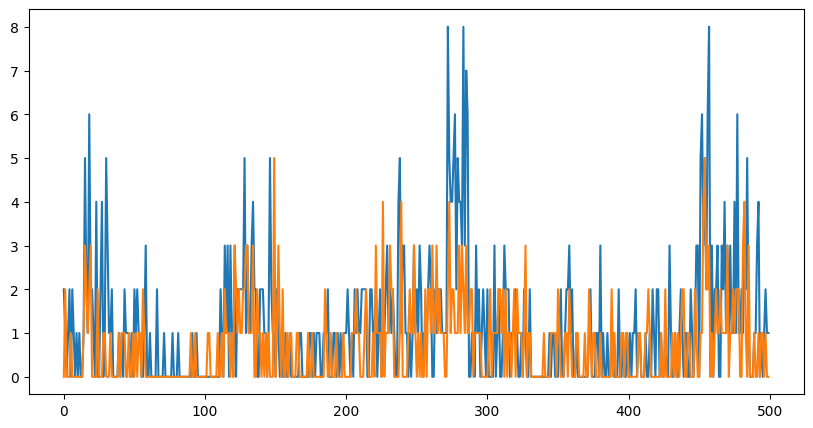

In [10]:

embed_dict_exp = {
    "rect_func": 'exp', # exp, sigmoid, softplus
    "fr_scaling": 1.0,
    
}
sim_exp = NeuralDataSimulatorGeneral(embed_dict = embed_dict_exp, noise_dict = noise_dict_poisson)

embed_dict_softplus = {
    "rect_func": 'softplus', # exp, sigmoid, softplus
    "fr_scaling": 1.0,
}
sim_softplus = NeuralDataSimulatorGeneral(embed_dict = embed_dict_softplus, noise_dict = noise_dict_poisson)

sim_exp = sim_exp.generate_simulated_data(
    task_trained_model = wrapper, 
    datamodule = dm, 
    seed = 0,   
    )

sim_softplus = sim_softplus.generate_simulated_data(
    task_trained_model = wrapper, 
    datamodule = dm, 
    seed = 0,   
    )

data_exp = sim_exp['data']
data_softplus = sim_softplus['data']
trial = 1
neuron = 0
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1,1,1)

ax.plot(data_exp[trial,:,neuron], label = "exp")
ax.plot(data_softplus[trial,:,neuron], label = "softplus")


ax.title("Exp vs Softplus Rectification")

fig1 = plt.figure(figsize = (6, 3))

fig1.suptitle("Exp Rectification")
ax1 = fig1.subplots(nrows= 1, ncols =2)
ax1[0].imshow(data_exp[trial,:,:].T, aspect = 'auto')
ax1[0].set_title("Exp")
ax1[0].set_ylabel("Neurons")

ax1[1].imshow(data_softplus[trial,:,:].T, aspect = 'auto')
ax1[1].set_title("Softplus")
ax1[1].set_xlabel("Time (bins)")
ax1[1].set_yticklabels([])

plt.show()

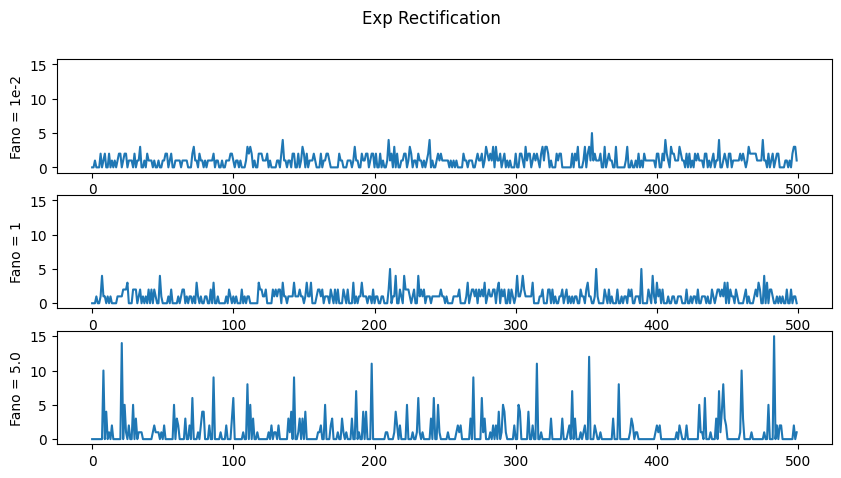

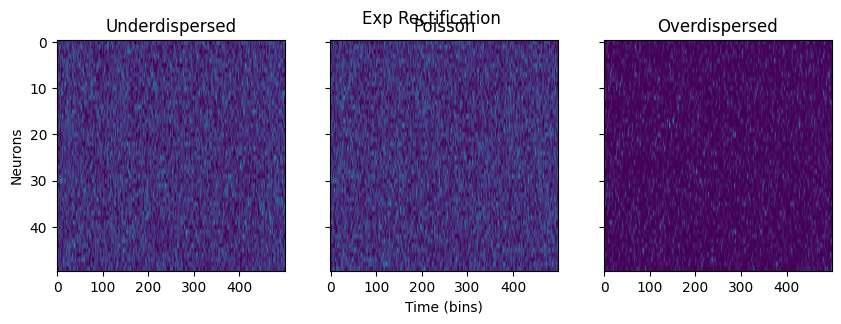

In [9]:

data_under = sim_dict_under['data']
data_poisson = sim_dict_poisson['data']
data_over = sim_dict_over['data']
trial = 1
neuron = 0
fig = plt.figure(figsize = (10, 5))
ax = fig.subplots(nrows= 3, ncols =1, sharey= True)


ax[0].plot(data_under[trial,:,neuron], label = "under")
ax[0].set_ylabel("Fano = 1e-2")

ax[1].plot(data_poisson[trial,:,neuron], label = "poisson")
ax[1].set_ylabel("Fano = 1")

ax[2].plot(data_over[trial,:,neuron], label = "over")
ax[2].set_ylabel("Fano = 5.0")

fig.suptitle("Exp Rectification")

fig1 = plt.figure(figsize = (10, 3))

fig1.suptitle("Exp Rectification")
ax1 = fig1.subplots(nrows= 1, ncols =3)
ax1[0].imshow(data_under[trial,:,:].T, aspect = 'auto')
ax1[0].set_title("Underdispersed")
ax1[0].set_ylabel("Neurons")

ax1[1].imshow(data_poisson[trial,:,:].T, aspect = 'auto')
ax1[1].set_title("Poisson")
ax1[1].set_xlabel("Time (bins)")
ax1[1].set_yticklabels([])

ax1[2].imshow(data_over[trial,:,:].T, aspect = 'auto')
ax1[2].set_yticklabels([])
ax1[2].set_title("Overdispersed")
plt.show()

In [ ]:
embed_dict = {
    "rect_func": 'softplus', # exp, sigmoid, softplus
    "fr_scaling": 1.0,
    
}
noise_dict_under = {
    "obs_noise": "pseudoPoisson",
    "dispersion": 0.01,
}
noise_dict_poisson = {
    "obs_noise": "pseudoPoisson",
    "dispersion": 1.0
}
noise_dict_poisson_true = {
    "obs_noise": "poisson",
}
noise_dict_over = {
    "obs_noise": "pseudoPoisson",
    "dispersion": 5.0
}
sim_under = NeuralDataSimulatorGeneral(embed_dict = embed_dict, noise_dict = noise_dict_under)
sim_poisson = NeuralDataSimulatorGeneral(embed_dict = embed_dict, noise_dict = noise_dict_poisson)
sim_over = NeuralDataSimulatorGeneral(embed_dict = embed_dict, noise_dict = noise_dict_over)

sim_dict_under = sim_under.generate_simulated_data(
    task_trained_model = wrapper, 
    datamodule = dm,
    seed = 0,   
    )

sim_dict_poisson = sim_poisson.generate_simulated_data(
    task_trained_model = wrapper, 
    datamodule = dm, 
    seed = 0,   
    )

sim_dict_over = sim_over.generate_simulated_data(
    task_trained_model = wrapper, 
    datamodule = dm, 
    seed = 0,   
    )


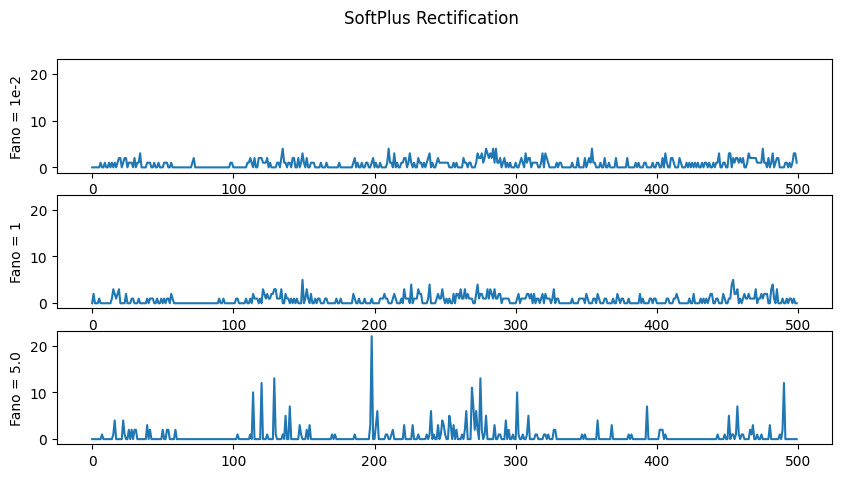

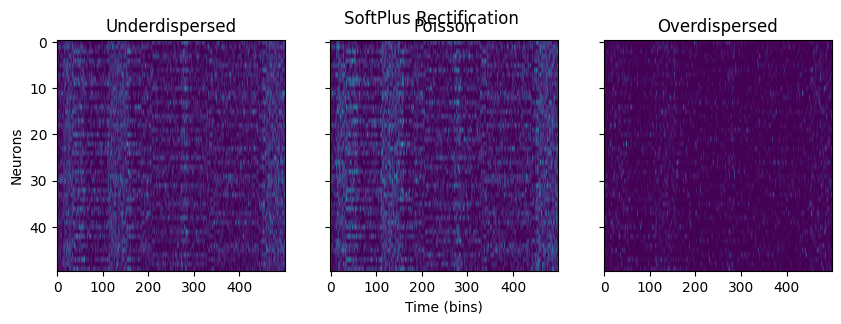

In [ ]:
data_under = sim_dict_under['data']
data_poisson = sim_dict_poisson['data']
data_over = sim_dict_over['data']
trial = 1
neuron = 0
fig = plt.figure(figsize = (10, 5))
ax = fig.subplots(nrows= 3, ncols =1, sharey= True)


ax[0].plot(data_under[trial,:,neuron], label = "under")
ax[0].set_ylabel("Fano = 1e-2")

ax[1].plot(data_poisson[trial,:,neuron], label = "poisson")
ax[1].set_ylabel("Fano = 1")

ax[2].plot(data_over[trial,:,neuron], label = "over")
ax[2].set_ylabel("Fano = 5.0")
fig.suptitle("SoftPlus Rectification")

fig1 = plt.figure(figsize = (10, 3))

fig1.suptitle("SoftPlus Rectification")
ax1 = fig1.subplots(nrows= 1, ncols =3)
ax1[0].imshow(data_under[trial,:,:].T, aspect = 'auto')
ax1[0].set_title("Underdispersed")
ax1[0].set_ylabel("Neurons")

ax1[1].imshow(data_poisson[trial,:,:].T, aspect = 'auto')
ax1[1].set_title("Poisson")
ax1[1].set_xlabel("Time (bins)")
ax1[1].set_yticklabels([])

ax1[2].imshow(data_over[trial,:,:].T, aspect = 'auto')
ax1[2].set_yticklabels([])
ax1[2].set_title("Overdispersed")
plt.show()